In [87]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

#Load the dataset in a dataframe called gdp
df = pd.read_csv('all_data.csv')
#Quick overview of the data
print(df.head())
print(df.Country.unique())
print(df.Year.unique())

  Country  Year  Life expectancy at birth (years)           GDP
0   Chile  2000                              77.3  7.786093e+10
1   Chile  2001                              77.3  7.097992e+10
2   Chile  2002                              77.8  6.973681e+10
3   Chile  2003                              77.9  7.564346e+10
4   Chile  2004                              78.0  9.921039e+10
['Chile' 'China' 'Germany' 'Mexico' 'United States of America' 'Zimbabwe']
[2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013
 2014 2015]


In [88]:
#Analysing the means of GDP and Life expectancy for each country
dfMeans = df.drop("Year", axis = 1).groupby("Country").mean().reset_index()
dfMeans


,Country,Life expectancy at birth (years),GDP
0,Chile,78.94375,1.697888e+11
1,China,74.26250,4.957714e+12
2,Germany,79.65625,3.094776e+12
3,Mexico,75.71875,9.766506e+11
4,United States of America,78.06250,1.407500e+13
5,Zimbabwe,50.09375,9.062580e+09


<AxesSubplot: xlabel='Life expectancy at birth (years)', ylabel='Count'>

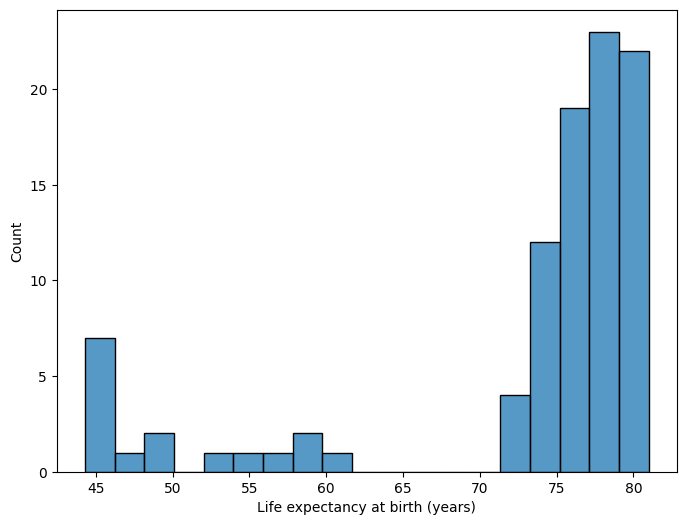

In [89]:
#Plotting the distribution of the life expectancy
plt.figure(figsize=(8,6))
sns.histplot(df['Life expectancy at birth (years)'])


We can clearly see that the plot above is right-skewed, which follows the evalution of the countries differents averages we have above, in which five of the six countries have an average in the range of 75 to 78 years, with Zimbabwe averaging around 50 years.

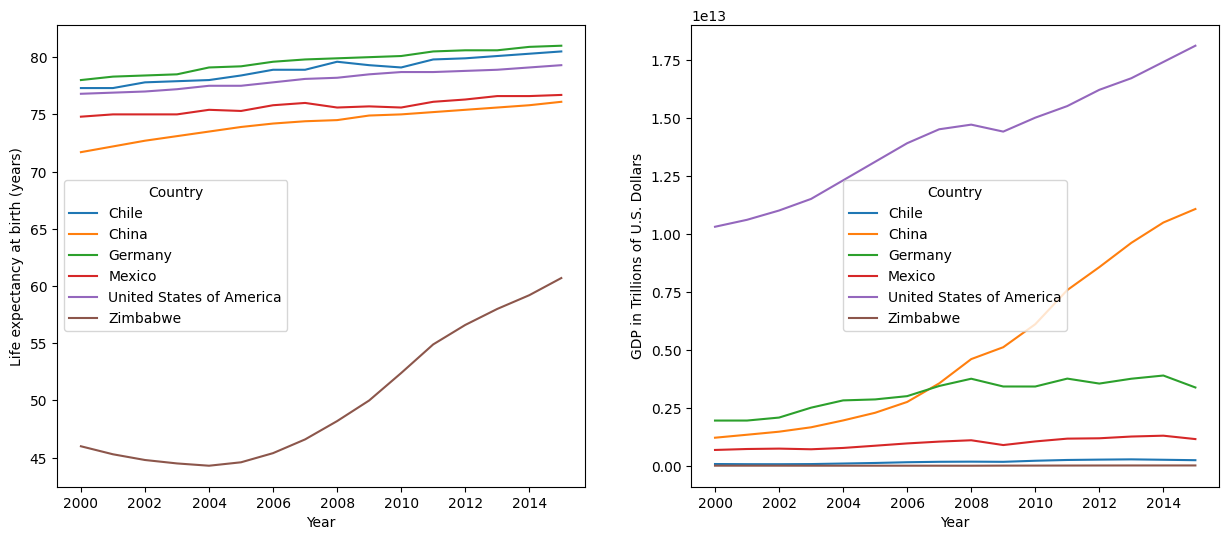

In [90]:
#Plotting of the relevant comparisons between GDP over the years and Life Expectancty at birth over the years
fig, axes = plt.subplots(1,2, figsize=(15,6))
sns.lineplot(ax=axes[0],data=df, x=df['Year'], y=df['Life expectancy at birth (years)'], hue=df['Country'])
sns.lineplot(ax=axes[1],data=df, x=df['Year'], y=df['GDP'], hue=df['Country'])
plt.ylabel("GDP in Trillions of U.S. Dollars");


Althought the two plots above provide some important information at first glance, the scale of the GDP graph makes it hard to see changes in the GDP of countries such as Chile and Zimbabwe, so in order to properly see how it has evolved over the years, we'll use the FacetGrid method from the seaborn library, which will allow us to see each countries growth with their own respective y-axis scale.

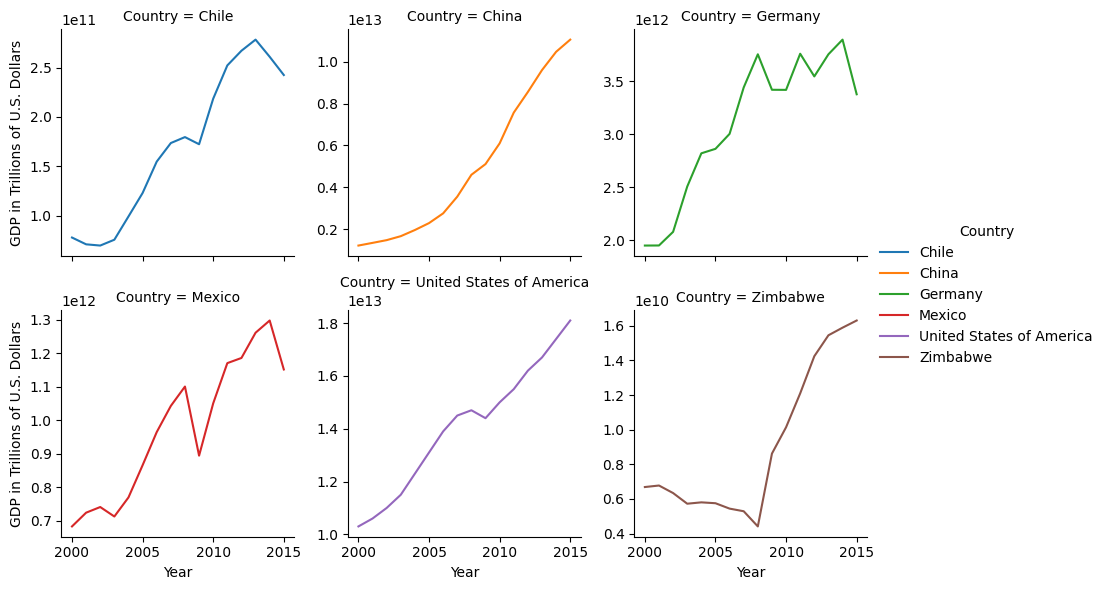

In [91]:
#Plotting the GDP of every country over the years with their own scale
gdp_graph = sns.FacetGrid(df, col="Country", col_wrap=3,hue = "Country", sharey = False)
gdp_graph = (gdp_graph.map(sns.lineplot,"Year","GDP").add_legend().set_axis_labels("Year","GDP in Trillions of U.S. Dollars"))
gdp_graph;

We can also do the same for the Life Expectancy at birth, to make it easier to read how it has evolved over the years

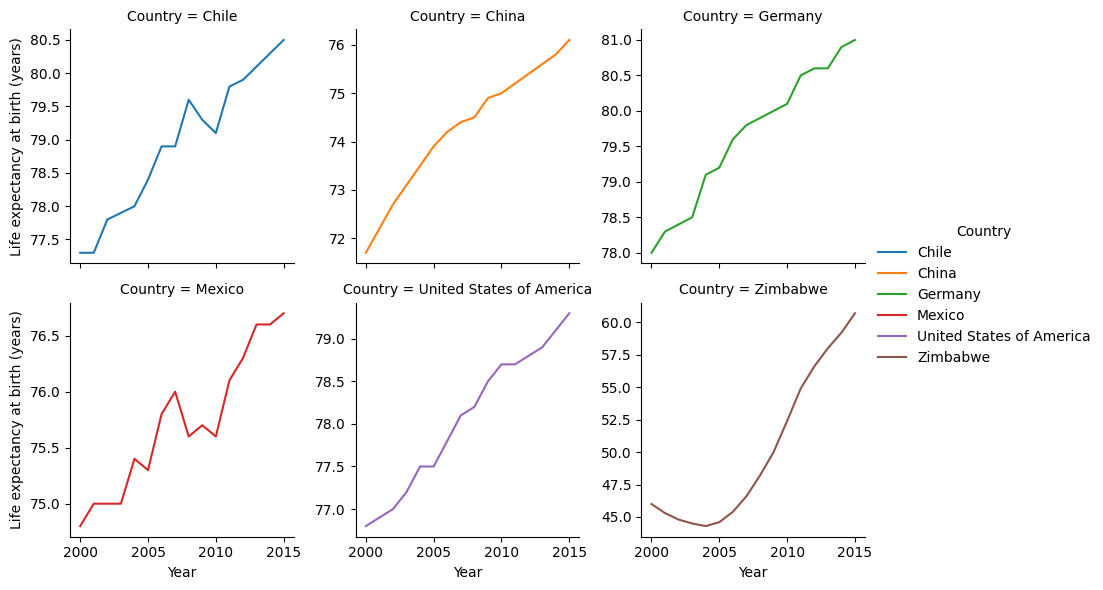

In [92]:
#Plotting the life expectancy at birth of each country in separated graphs, just as we have done above for the GDP
life_expectancy_graph = sns.FacetGrid(df, col="Country", col_wrap=3,hue = "Country", sharey = False)
life_expectancy_graph = (life_expectancy_graph.map(sns.lineplot,"Year","Life expectancy at birth (years)").add_legend().set_axis_labels("Year","Life expectancy at birth (years)"))
life_expectancy_graph;

Now after having analysed the data, let's answer the questions related to the project:
- Has life expectancy increased over time in the six nations?
    - Yes with Zimbabwe having the greatest increase.
- Has GDP increased over time in the six nations?
    - GDP has also increased for all countries in our list, especially for China.
- Is there a correlation between GDP and life expectancy of a country?
    - Yes there is a positive correlation between GDP and life expectancy for countries in our list.
- What is the average life expectancy in these nations?
    - Average life expectancy was between mid to high 70s for the countries except for Zimbabwe which was 50.
- What is the distribution of that life expectancy?
    - the life expectancy had a left skew, or most of the observations were on the right side.